<center><h1> Projet Deep learning </h1></center>
<center><h2> Classification de Chiffres Manuscrits avec Réseaux de Neurones Convolutifs
(CNN) sur le jeu de données MNIST</h2></center>

# **Etape 1 : Prise en main du jeu MNIST**

In [ ]:
# Etape 1 : Prise en main du jeu MNIST
#importation des bibliothèques necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io
from skimage import img_as_float
from skimage.transform import resize, rotate
from skimage.color import rgb2gray


In [ ]:
#installation du framework TensorFlow
! pip install tensorflow

In [ ]:
#importer la dataset à l'aide du framework Tensorflow avec la fonction de téléchargement tensorflow tf.keras.datasets.
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


test : 10000
train 60000


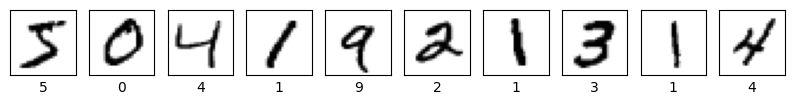

In [ ]:
# Taille du jeu de données de test
test_data_size = test_images.shape[0]
print("test :" ,test_data_size )
# Taille du jeu de données d'entraînement
train_data_size = train_images.shape[0]
print("train", train_data_size )

#visualisation de 10 images grayscale
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


# **Etape 2 : Pretraitement des données**

**Création de l'ensemble du test :**Comme première étape de prétraitement, la création de l'ensemble du test est importante pour l'évaluation de notre modèle, mais pour cette dataset MNIST elle n'est pas necessaire, car la dataset est déja prédivisé en partie test et partie train.

**Redimensionnement de la dataset** : comme 2ème phase de prétraitement on , doit s'assurer que toutes les images de la datset on la même dimension :
ici la taille est 28 x 28

In [ ]:
# Obtenir les tailles des images dans le jeu de données MNIST
heights = [img.shape[0] for img in train_images]
widths = [img.shape[1] for img in train_images]

# Affichez les dimensions typiques des images
print("Minimum image height:", min(heights))
print("Maximum image height:", max(heights))
print()
print("Minimum image widths:", min(widths))
print("Minimum image widths:", max(widths))



Minimum image height: 28
Maximum image height: 28

Minimum image widths: 28
Minimum image widths: 28


In [ ]:

# Redimensionner les images pour qu'elles aient la forme (num_samples, 28, 28, 1)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convertir les valeurs de pixel en flottants
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Étape 1: Soustraction de la moyenne
mean_value = np.mean(train_images)
train_images_normalized = train_images - mean_value

# Étape 2: Division par l'écart type
std_dev = np.std(train_images_normalized)
train_images_normalized /= std_dev

# Normalisation des images de test en utilisant la même moyenne et le même écart type
test_images_normalized = (test_images - mean_value) / std_dev


 ---->  Puisque toute nos images ont la même dimension , on a pas besoin de le redimensionnées

 **Normalisation des pixels de l'intervale [0,255] à [0, 1]** : même si les images téléchargées sont en grayscale ,la normalisation des pixels est toujours recommandée pour une bonne convergence d'entrainement et une bonne performance du modèle  .

In [ ]:
# Convertir les valeurs de pixel en flottants
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Soustraction de la moyenne
mean_value = np.mean(train_images)
train_images_normalized = train_images - mean_value

# Division par l'écart type
std_dev = np.std(train_images_normalized)
train_images_normalized /= std_dev

# Normalisation des images de test en utilisant la même moyenne et le même écart type
test_images_normalized = (test_images - mean_value) / std_dev

# Remodeler les données  : Les images sont remodelées pour ajouter une dimension de canal, même si les images sont en niveaux de gris.
# Cela rend les images compatibles avec les modèles CNN
train_images_normalized = train_images_normalized.reshape((train_images_normalized.shape[0], 28, 28, 1))
test_images_normalized = test_images_normalized.reshape((test_images_normalized.shape[0], 28, 28, 1))



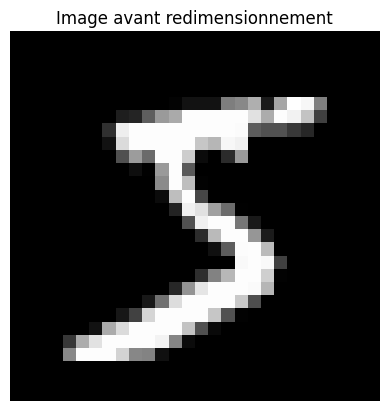

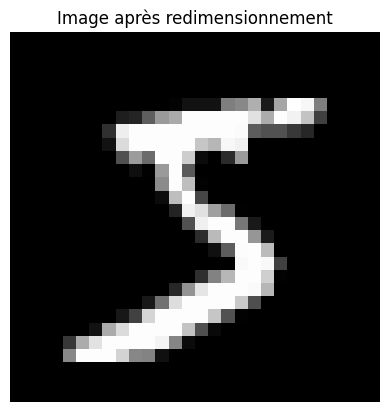

In [ ]:
# Afficher une image avant redimensionnement
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title('Image avant redimensionnement')
plt.axis('off')  # Masquer les axes
plt.show()

# Afficher la même image après redimensionnement
plt.figure()
plt.imshow(train_images_normalized [0], cmap='gray')
plt.title('Image après redimensionnement')
plt.axis('off')  # Masquer les axes
plt.show()

**Conversion des labels en vecteurs binaires (one-hot encoding)**: il ya plusieurs méthodes de conversion , mais puisque on utilise
la biblio keras intégrée dans tensorflow , on va utiliser la fonction to_categorical qui convertit les étiquettes entières en vecteurs binaires.


In [ ]:
# Affichage des étiquettes d'entraînement avant la conversion
print("Étiquettes d'entraînement avant conversion :")
print(train_labels[:10])  # Afficher les 10 premières étiquettes d'entraînement

Étiquettes d'entraînement avant conversion :
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
#importer la bibiothèque
from tensorflow.keras.utils import to_categorical

# Convertir les étiquettes en vecteurs binaires
train_labels_one_hot = to_categorical(train_labels, 10) # Nombre de classes dans MNIST (0 à 9)
test_labels_one_hot = to_categorical(test_labels, 10)  # Nombre de classes dans MNIST (0 à 9)

# Afficher les étiquettes après la conversion
print("\nÉtiquettes d'entraînement après conversion en vecteurs binaires :")
print(train_labels_one_hot[:10])  # Afficher les 10 premiers vecteurs binaires



Étiquettes d'entraînement après conversion en vecteurs binaires :
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


 **Séparation de données en entrainemet, validation et test :**
pour cela , on a utilisé la bibliothèque **PyTorch** pour diviser l'ensemble de données en ensembles d'entraînement et de validation importer la bibliothèque PyTorch et la classe DataLoader de PyTorch, qui permet de charger des données en lots pour l'entraînement des modèles.
Les modèles PyTorch sont conçus pour fonctionner avec des objets de type torch.Tensor.

 **Les tenseurs** sont une structure de données de PyTorch similaire aux arrays de NumPy mais avec des capacités supplémentaires, telles que la possibilité d'être transférés vers et depuis des GPU pour accélérer les calculs.

In [ ]:
import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

# Créer des tenseurs à partir de vos données d'origine et de leurs étiquettes
train_images_tensor = torch.tensor(train_images_normalized, dtype=torch.float32) #float32 pour les images et long pour les étiquettes
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long) #Les étiquettes des classes doivent être (torch.long) car les fonctions de perte (comme CrossEntropyLoss en PyTorch) s'attendent à ce que les cibles soient dans ce format.
test_images_tensor = torch.tensor(test_images_normalized, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Division des données d'entraînement en ensembles d'entraînement et de validation
train_images_split, val_images_split, train_labels_split, val_labels_split = train_test_split(train_images_tensor, train_labels_tensor, test_size=0.1, random_state=42)

# Créer des ensembles de données d'entraînement, de validation et de test
train_dataset = TensorDataset(train_images_split, train_labels_split) #TensorDataset permet de grouper les données (features) et les étiquettes (labels) ensemble
val_dataset = TensorDataset(val_images_split, val_labels_split)
test_dataset = TensorDataset(torch.tensor(test_images), torch.tensor(test_labels))

# Tailles des ensembles de données
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

# Afficher les tailles des ensembles de données
print("Taille de l'ensemble d'entraînement:", train_size)
print("Taille de l'ensemble de validation:", val_size)
print("Taille de l'ensemble de test:", test_size)



Taille de l'ensemble d'entraînement: 54000
Taille de l'ensemble de validation: 6000
Taille de l'ensemble de test: 10000


Maintenant on va  afficher les dix premières images d'entraînement et de validation après leurs conversion en tenseurs PyTorch, ainsi que leurs étiquettes correspondantes.

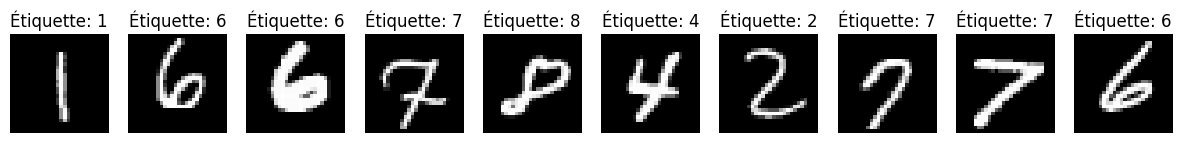

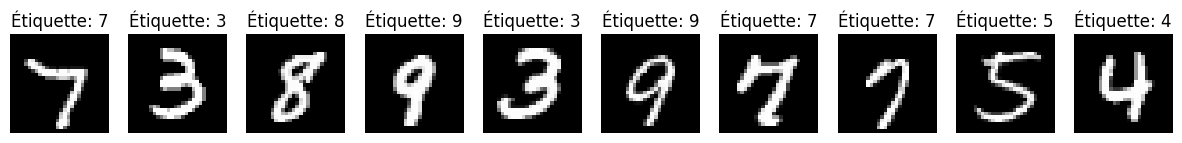

In [ ]:
# Afficher les premières images d'entraînement après conversion
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(train_images_split[i].numpy().reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Étiquette: {train_labels_split[i].item()}")
    axes[i].axis('off')
plt.show()


# Afficher les premières images d'entraînement après conversion
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(val_images_split[i].numpy().reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Étiquette: {val_labels_split[i].item()}")
    axes[i].axis('off')
plt.show()

## **Pourquoi cette séparation est-elle importante ?**

1. **Évaluation correcte du modèle** :Séparer les ensembles de données permet d'évaluer correctement la performance du modèle sur des données non vues.
2. **Réglage des hyperparamètres** : l'ensemble de validation permet de tester différentes configurations du modèle et de choisir la meilleure sans utiliser les données de test
3. **Prévention du surapprentissage (overfitting)** : l'ensemble de validation distinct permet de détecter et de prévenir le surapprentissage.





# **Etape 3 : Construction du modèle CNN**




In [ ]:
# 1- définition du modèle :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Construction du modèle CNN
model_mnist = Sequential()

# Utilisation de couches de convolution, de pooling et de couches entièrement connectées.
# Première couche de convolution et pooling
model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(MaxPooling2D((2, 2)))

# Deuxième couche de convolution et pooling
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(MaxPooling2D((2, 2)))

# Troisième couche de convolution
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))

# Aplatissage et couche dense : On a terminé avec les filtres et le max pooling
model_mnist.add(Flatten())

model_mnist.add(Dense(64, activation='relu'))

# Couche de sortie
model_mnist.add(Dense(10, activation='softmax'))


l'utilisation de la technique d'**EarlyStopping** qui permet d’arrêter l’apprentissage dés lors que le modèle commence à faire du sur-apprentissage et économise le temps de calcul.

**patience=2** : Indique que l'entraînement sera arrêté si la perte de validation ne s'améliore pas pendant 2 époques consécutives.

**monitor='val_loss'** : Spécifie que la métrique surveillée est la perte de validation (val_loss). Le callback EarlyStopping surveillera cette métrique pour détecter les changements dans la performance du modèle sur l'ensemble de validation.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Utilisation de EarlyStopping pour éviter le surapprentissage
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

**model_mnist.summary()** affichera un résumé du modèle, y compris les types et les formes des couches, ainsi que le nombre de paramètres entraînables et non entraînables.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

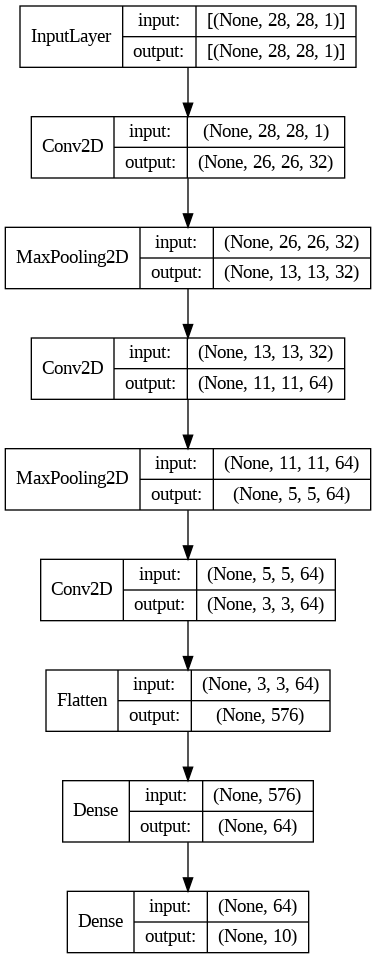

In [ ]:
from tensorflow.keras.utils import plot_model
# Compilation du modèle
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mnist.summary()

# Visualisation de l'architecture du modèle
plot_model(model_mnist, to_file='model_mnist.png', show_shapes=True, show_layer_names=False)

#l y a 320 paramètres entraînables dans cette couche (les poids des filtres ainsi que les biais).
# flatten : la sortie est un vecteur de longueur 576

---- > Notre modèle va devoir apprendre 93 322 paramètres , cela va prendre du temps .

# **Etape 4 : Entrainement du modèle**

In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

val_labels_one_hot = to_categorical(val_labels_split, 10)  # Nombre de classes dans MNIST (0 à 9)
# Convertir les tenseurs PyTorch en tenseurs TensorFlow
train_images_tf = tf.convert_to_tensor(train_images)
train_labels_tf = tf.convert_to_tensor(train_labels_one_hot)
val_images_tf = tf.convert_to_tensor(val_images_split)
val_labels_tf = tf.convert_to_tensor(val_labels_one_hot)
test_images_tf = tf.convert_to_tensor(test_images)
test_labels_tf = tf.convert_to_tensor(test_labels_one_hot)

# Entraînement du modèle avec les tenseurs TensorFlow
history = model_mnist.fit(train_images_tf, train_labels_tf, epochs=10, batch_size=64, validation_data=(val_images_tf, val_labels_tf),callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0619 - accuracy: 0.9809 - val_loss: 2.1599 - val_accuracy: 0.9460
Epoch 2/10
938/938 [==============================] - 53s 57ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 2.1573 - val_accuracy: 0.8948
Epoch 3/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 2.1482 - val_accuracy: 0.8150
Epoch 4/10
938/938 [==============================] - 56s 59ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 2.1646 - val_accuracy: 0.7133
Epoch 5/10
938/938 [==============================] - 54s 58ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 2.1742 - val_accuracy: 0.6022
Epoch 6/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 2.1619 - val_accuracy: 0.4723


## Analyse des Résultats

1.  **Précision en entraînement élevée** : La précision sur l'ensemble
d'entraînement augmente constamment, atteignant plus de 99% dès la cinquième époque. Cela montre que votre modèle apprend bien les données d'entraînement.
   
2. **Diminution de la précision en validation** : La précision sur l'ensemble de validation diminue de manière significative après la première époque, passant de 94.6% à 47.23% à la sixième époque. Cela indique que le modèle ne généralise pas bien sur des données qu'il n'a pas vues auparavant.
  
3. **Augmentation de la perte en validation** : La perte sur l'ensemble
devalidation reste élevée et augmente, ce qui est un autre indicateur de surapprentissage.







# **Etape 5 : Évaluation du modèle sur l'ensemble de test**

**1- Évaluation des performances du modèle sur l'ensemble de test :**

313/313 [==============================] - 4s 12ms/step - loss: 0.0594 - accuracy: 0.9833
Test Loss: 0.059366852045059204
Test Accuracy: 0.983299970626831


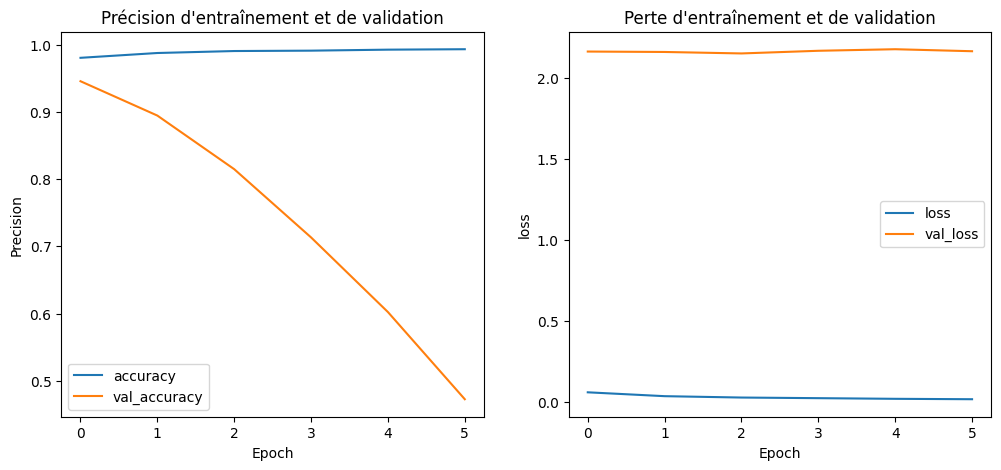

In [ ]:
# Évaluer le modèle sur l'ensemble de test
test_images_tf = tf.convert_to_tensor(test_images)  # Assurez-vous que cela est normalisé si nécessaire
test_labels_tf = tf.convert_to_tensor(test_labels_one_hot) #convertir les labels one_hot en tenseur Tensorflow pour s'assurer que les données sont dans le format correct pour être traitées efficacement par les fonctions TensorFlow


# Utilisez les tenseurs convertis dans l'évaluation
test_loss, test_accuracy = model_mnist.evaluate(test_images_tf, test_labels_tf)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Tracer les courbes de précision
plt.figure(figsize=(12, 5))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.title('Précision d\'entraînement et de validation')

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Perte d\'entraînement et de validation')

plt.show()

##Analyse des résultats

1.  **Précision élevée** : Une précision de 98.33% sur les données de test indique que votre modèle généralise bien, au moins pour cet ensemble de données.
2.  **Perte faible** : Une perte de 0.0594 montre que le modèle fait peu d'erreurs significatives.



    
   

**2 - Analyse des résultats à l'aide des mesures de performance :**  

1.   Matrice de confusion
2.   Précision
3.   Rappel
4.   F1 score


In [ ]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Prédiction des probabilités pour chaque classe
y_prob = model_mnist.predict(test_images)

# Obtention des classes prédites
y_pred = np.argmax(y_prob, axis=1)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(test_labels_one_hot, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

# Calcul de la précision
precision = precision_score(test_labels, y_pred, average='weighted')
print("Précision :", precision)

# Calcul du rappel
recall = recall_score(test_labels, y_pred, average='weighted')
print("Rappel :", recall)

# Calcul du score F1
f1 = f1_score(test_labels, y_pred, average='weighted')
print("Score F1 :", f1)



313/313 [==============================] - 4s 11ms/step
Matrice de confusion :
[[ 974    0    1    0    0    0    2    0    2    1]
 [   0 1127    1    4    0    1    2    0    0    0]
 [   1    0 1021    6    0    0    1    1    2    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  958    0    3    0    5   16]
 [   0    0    0   11    0  878    1    0    1    1]
 [   2    1    0    0    2    2  949    0    2    0]
 [   0    6   18   35    0    2    0  956    1   10]
 [   1    0    1    1    0    2    1    0  967    1]
 [   0    0    0    0    3    5    0    0    4  997]]
Précision : 0.9836565046098862
Rappel : 0.9833
Score F1 : 0.9832655854732764


**Matrice de confusion :** La matrice de confusion montre le nombre de prédictions correctes et incorrectes pour chaque classe. Les valeurs diagonales représentent les prédictions correctes, tandis que les valeurs non diagonales représentent les prédictions incorrectes.

**Précision :** La précision mesure le nombre de prédictions correctes parmi toutes les prédictions faites pour une classe donnée. Une précision élevée indique un faible nombre de fausses prédictions.

**Rappel :** Le rappel mesure la proportion de vrais positifs parmi tous les exemples positifs réels. Un rappel élevé indique qu'un grand nombre de vrais positifs ont été correctement identifiés.

**Score F1 :** Le score F1 est la moyenne harmonique de la précision et du rappel. Il fournit une mesure unique de la performance du modèle qui prend en compte à la fois la précision et le rappel.

Dans ce cas, le modèle a une précision de **98,36 %**, un rappel de **98,33 %** et un score F1 de **98,32 %**.

 --- > Ces valeurs indiquent que le modèle a de très bonnes performances sur l'ensemble de test.

#**Etape 6 :  Améliorations et expérimentations :**

**Techniques d' augmentation de data et de de régularisation :**

1 - **Régularisation**

 **La couche Dropout** offre une régularisation en désactivant de manière aléatoire un certain pourcentage des neurones pendant la phase d'entraînement.


2 - **Augmentation des données** : L'augmentation des données consiste à appliquer des transformations aléatoires aux images d'entraînement, telles que la rotation, la translation , le zoom.

 Cela augmente la taille effective de l'ensemble de données d'entraînement, ce qui permet au modèle de voir plus de variations des données pendant l'entraînement et donc d'améliorer sa capacité à généraliser à de nouvelles données

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Construction du modèle CNN
model_mnist = Sequential()

# Première couche de convolution et pooling
model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(MaxPooling2D((2, 2)))

# Deuxième couche de convolution et pooling
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(MaxPooling2D((2, 2)))

# Troisième couche de convolution
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))

# Aplatissage et couche dense : On a terminé avec les filtres et le max pooling
model_mnist.add(Flatten())
model_mnist.add(Dense(64, activation='relu'))

# Ajout de dropout pour la régularisation : éviter le surapprentissage du modèle
model_mnist.add(Dropout(0.5))

# Couche de sortie
model_mnist.add(Dense(10, activation='softmax'))

# Compilation du modèle
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visualisation de l'architecture du modèle
plot_model(model_mnist, to_file='model_mnist.png', show_shapes=True, show_layer_names=True)

# Augmentation des données
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

#EarlyStopping est utilisé pour arrêter l'entraînement si le modèle commence à surapprendre.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


# Entraînement du modèle avec augmentation des données
history = model_mnist.fit(datagen.flow(train_images_tf, train_labels_tf, batch_size=64), steps_per_epoch=len(train_images_tf) / 64, epochs=10,  validation_data=(val_images_tf, val_labels_tf))



Epoch 1/10
  1/937 [..............................] - ETA: 32:11 - loss: 29.4712 - accuracy: 0.0938

KeyboardInterrupt: 

In [ ]:
#Etape 6 :  Améliorations et expérimentations :
# - Techniques d' augmentation de data et de de régularisation :
#La couche Dropout offre une régularisation en désactivant de manière aléatoire un certain pourcentage des neurones pendant la phase d'entraînement.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Construction du modèle CNN
model_mnist = Sequential()

# Première couche de convolution et pooling
model_mnist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(MaxPooling2D((2, 2)))

# Deuxième couche de convolution et pooling
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(MaxPooling2D((2, 2)))

# Troisième couche de convolution
model_mnist.add(Conv2D(64, (3, 3), activation='relu'))

# Aplatissage et couche dense : On a terminé avec les filtres et le max pooling
model_mnist.add(Flatten())
model_mnist.add(Dense(64, activation='relu'))

# Ajout de dropout pour la régularisation
model_mnist.add(Dropout(0.5))

# Couche de sortie
model_mnist.add(Dense(10, activation='softmax'))

# Compilation du modèle
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augmentation des données
dataug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
dataug.fit(train_images_normalized.reshape(-1, 28, 28, 1))

#normalisation de validation images :
val_images_normalized =(val_images - mean_value) / std_dev

# Entraînement du modèle avec augmentation des données
history = model_mnist.fit(dataug.flow(train_images_normalized.reshape(-1, 28, 28, 1), train_labels_one_hot, batch_size=64),
                          steps_per_epoch=len(train_images_normalized) / 64, epochs=10, validation_data=(val_images_normalized.reshape(-1, 28, 28, 1), val_labels_one_hot))





Epoch 1/10
938/937 [==============================] - ETA: 0s - loss: 0.4572 - accuracy: 0.8567

TypeError: Cannot convert the argument `type_value`: torch.float32 to a TensorFlow DType.

In [ ]:
#augmentation de données
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, #rotation de 10°
    width_shift_range=0.1, #translation horizontale 10%
    height_shift_range=0.1, #translation verticale  10%
    zoom_range=0.1 #zoom 10%
)

# Utiliser l'augmentation de données pendant l'entraînement
history = model_mnist.fit(datagen.flow(train_images, train_labels, batch_size=64),
                          epochs=10, validation_data=(val_images, val_labels))
